In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# read the data
data = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [5]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [6]:
# check basic features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [7]:
len(data)

13714

In [8]:
# check for doublications
data.duplicated().any()

False

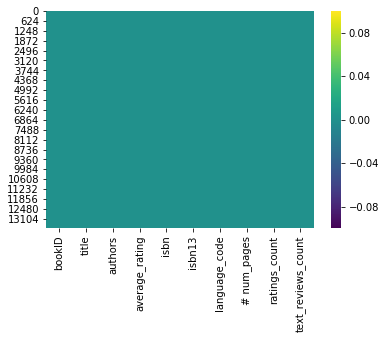

In [9]:
sns.heatmap(data.isnull(), cmap='viridis')

Text(0, 0.5, 'Frequency')

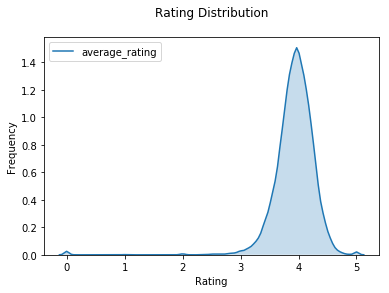

In [10]:
# ratings distribution
sns.kdeplot(data['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

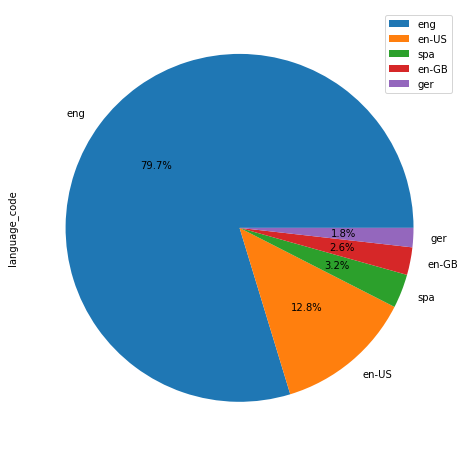

In [11]:
# top 5 languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

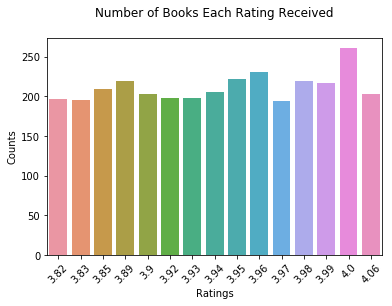

In [12]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

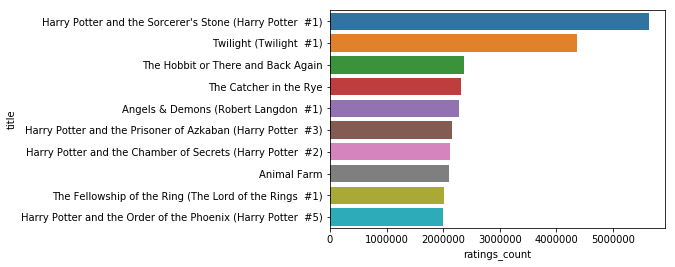

In [13]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

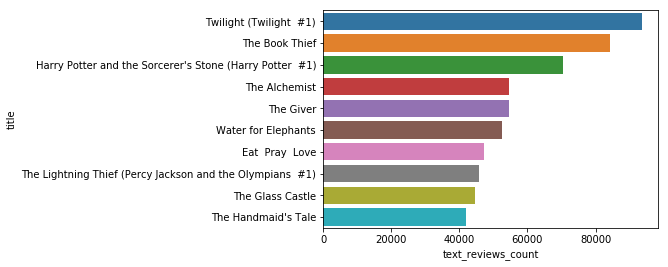

In [14]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])


Text(0.5, 0, 'Total Ratings')

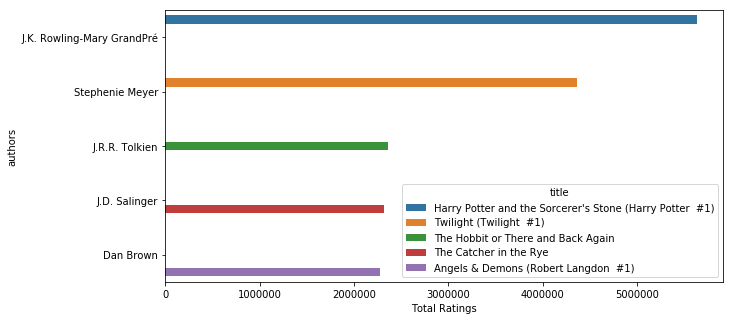

In [15]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')


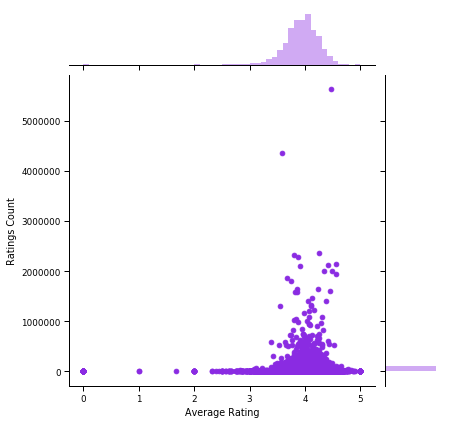

In [17]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = data, color = 'blueviolet')
ax.set_axis_labels("Average Rating", "Ratings Count")

In [18]:
trial = data[~(data.ratings_count>2000000)]

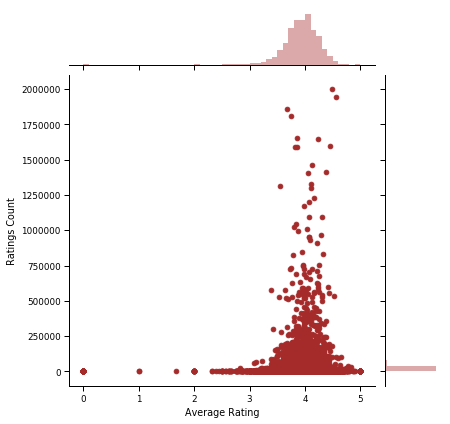

In [19]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = trial, color = 'brown')
ax.set_axis_labels("Average Rating", "Ratings Count")

In [21]:
trial = data[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

In [22]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

Text(0.5, 1.0, 'Elbow Curve')

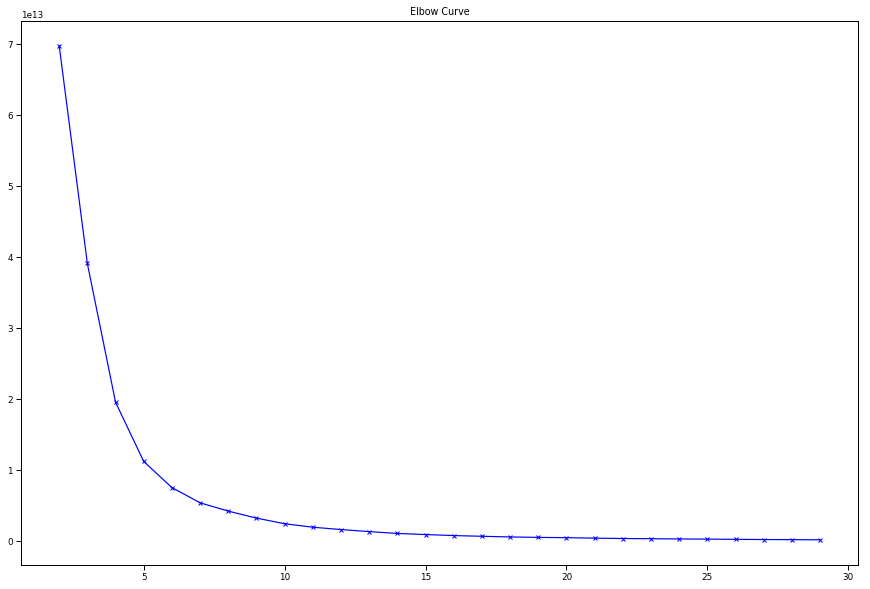

In [24]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

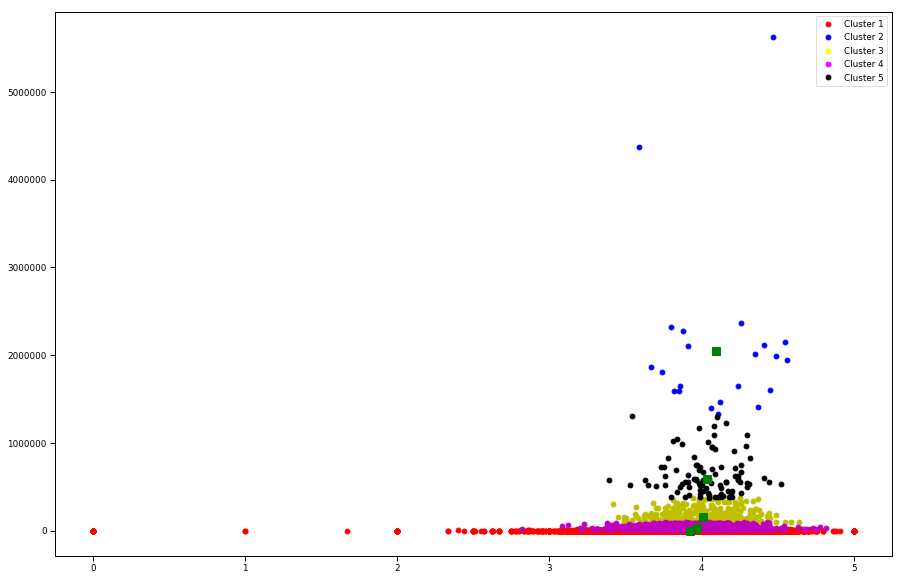

In [25]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
    )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )
circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()